<a href="https://colab.research.google.com/github/performant23/diabetes-prediction-lr/blob/main/Model_Diabetes_Prediction_using_Logistic_Regression_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model aims to establish relationship between factors like blood pressure and skin thickness with being diagnosed with diabetes. We explore this using logistic regression. The data is obtained from Pima Indians Diabetes Database (See below) and is relatively large enough to train a classifier which we can test on.

Limitations of this model:
1. Efficiency - For binary classification, logistic regression might not be the best classifier as opposed to models like SVM which uses confidence metric to evaluate boundaries and margins along with parameter tuning (C, gamma, kernel) and so, efficiency of this model will be lower as compared to the better classifiers
2. Data: While the data is relatively sufficient, it may not be the best representative of all the types of scenarios where one is/isn't diagnosed with diabetes. For one of the possible consequences of this i.e. overfitting, regularization and paramter tuning using GridSearch is implemented

Dataset Credit - Pima Indians Diabetes Database (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [ ]:
#Importing Important Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/diabetes.csv')
data


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.corr()
# We can see that glucose levels, pregnancies, and age is strongly correlated to outcome

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


Getting Feature Space (X) and predictor variable (Y)

In [ ]:
X = data.drop(['Outcome'], axis = 1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y = data['Outcome']
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
#Checking for missing, negative, or invalid values
missing_values = X.isnull().sum()
zero_values = (X == 0).sum()
negative_values = (X < 0).sum()
invalid_values = pd.concat([missing_values, zero_values, negative_values], axis=1)
invalid_values.columns = ['Missing Values', 'Zero Values', 'Negative Values']
print(invalid_values)

                          Missing Values  Zero Values  Negative Values
Pregnancies                            0          111                0
Glucose                                0            5                0
BloodPressure                          0           35                0
SkinThickness                          0          227                0
Insulin                                0          374                0
BMI                                    0           11                0
DiabetesPedigreeFunction               0            0                0
Age                                    0            0                0


In [ ]:
# Splitting the dataset into 'train' for training the model and 'test' - to test the model

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


In [ ]:
# Preprocessing the data to have mean - 0 and variance - 1

SSc = StandardScaler()
SSc.fit(X_train)

X_train = SSc.transform(X_train)
X_test = SSc.transform(X_test)


In [ ]:
#Implementing Logistic Regression
LR = LogisticRegression()
LR.fit(X_train, Y_train)

# Predictions
Y_train_pred = LR.predict(X_train)
Y_test_pred = LR.predict(X_test)

print("Intercept: ",LR.intercept_)
print("Coefficients: ",LR.coef_)
# Evaluation
train_accuracy = LR.score(X_train, Y_train)
test_accuracy = LR.score(X_test, Y_test)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Intercept:  [-0.87964347]
Coefficients:  [[ 0.18823163  1.13335776 -0.18631388 -0.02422067 -0.10468258  0.81150478
   0.14358094  0.41370604]]
Train Accuracy: 0.7821229050279329
Test Accuracy: 0.7359307359307359


As we saw above, some factors might just represent the outcome stronger than the others. So, we can use Principal Component Analysis (PCA) to analyze the effect of reducing number of components (If we get good accuracy, it might be beneficial as optimal number of components would make the model less complex and more flexible to generalize)

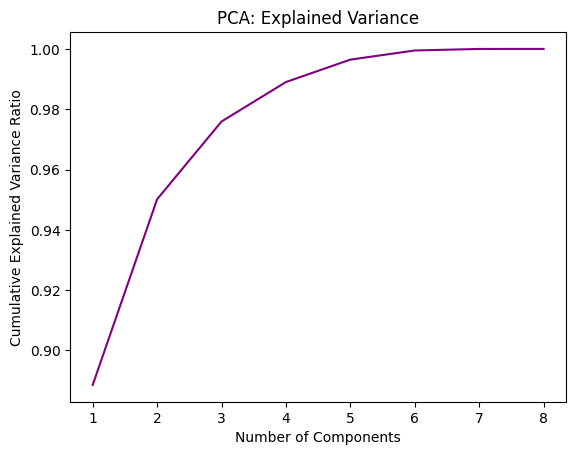

In [ ]:

pca = PCA()
X_pca = pca.fit_transform(X)

# Getting Cumulative Explained Variance Ratio
explained_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, color = 'purple')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('PCA: Explained Variance')
plt.show()


We can see that around 5-6 most important components can represent the data well. Still, we can go through the error scores for all number of components to get a comprehensive idea

In [ ]:
for z in range(1,9):
    pca = PCA(n_components=z)
    X_train_pca, X_test_pca, Y_train, Y_test = train_test_split(X_pca, Y, test_size=0.3, random_state=42)
    X_pca = pca.fit_transform(X)
    LR = LogisticRegression()
    LR.fit(X_train_pca, Y_train)
    # Predictions
    Y_train_pred = LR.predict(X_train_pca)
    Y_test_pred = LR.predict(X_test_pca)

# Evaluation
    train_accuracy = LR.score(X_train_pca, Y_train)
    test_accuracy = LR.score(X_test_pca, Y_test)

    print("Number of Components", z)
    print("Train Accuracy:", train_accuracy)
    print("Test Accuracy:", test_accuracy)
    print()


Number of Components 1
Train Accuracy: 0.7839851024208566
Test Accuracy: 0.7359307359307359

Number of Components 2
Train Accuracy: 0.6573556797020484
Test Accuracy: 0.6536796536796536

Number of Components 3
Train Accuracy: 0.7318435754189944
Test Accuracy: 0.7186147186147186

Number of Components 4
Train Accuracy: 0.7337057728119181
Test Accuracy: 0.7142857142857143

Number of Components 5
Train Accuracy: 0.7411545623836127
Test Accuracy: 0.7272727272727273

Number of Components 6
Train Accuracy: 0.7560521415270018
Test Accuracy: 0.7359307359307359

Number of Components 7
Train Accuracy: 0.7895716945996276
Test Accuracy: 0.7272727272727273

Number of Components 8
Train Accuracy: 0.7839851024208566
Test Accuracy: 0.7186147186147186



For 7 components, we achieve almost similar accuracies as with considering all components, a benefit being that we make the model less complex and allow for generalization

Now we explore the prospect of tuning the hyperparameters using GridSearch

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

param_grid = {
    'C': [0.01, 1.0, 10.0],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

LR = LogisticRegression()

grid_search = GridSearchCV(estimator=LR, param_grid=param_grid, cv=5)
grid_search.fit(X_train, Y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

Y_train_pred = best_model.predict(X_train)
Y_test_pred = best_model.predict(X_test)

train_accuracy = best_model.score(X_train, Y_train)
test_accuracy = best_model.score(X_test, Y_test)

print("Best Hyperparameters:", best_params)
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Best Hyperparameters: {'C': 10.0, 'penalty': 'l2', 'solver': 'liblinear'}
Train Accuracy: 0.7839851024208566
Test Accuracy: 0.7445887445887446


Thus we can observe that, we achieve the best accuracy for this data (might change based on data splits) is obtained by tuning the hyperparameters i.e. applying regularization to the model